In [1]:
val path = "/Users/shawnmeier/Documents/source/bounder/soot_hopper/target/scala-2.13/soot_hopper-assembly-0.1.jar"
// note: use sbt assembly to create jar
interp.load.cp(os.Path(path))
import $ivy.`org.plotly-scala::plotly-almond:0.8.1`
import $ivy.`com.lihaoyi:ujson_2.13:1.3.8`
// import $ivy.`edu.colorado.plv.bounder:soot_hopper_2.13:0.1`

import ujson.Value
import sys.process._

// interp.load.ivy("com.github.pathikrit" %% "better-files" % "3.9.1")
import $ivy.`com.github.pathikrit::better-files:3.9.1`
import better.files._



path: String = "/Users/shawnmeier/Documents/source/bounder/soot_hopper/target/scala-2.13/soot_hopper-assembly-0.1.jar"
import $ivy.$                                      

import $ivy.$                             
// import $ivy.`edu.colorado.plv.bounder:soot_hopper_2.13:0.1`


import ujson.Value

import sys.process._

// interp.load.ivy("com.github.pathikrit" %% "better-files" % "3.9.1")

import $ivy.$                                         

import better.files._



In [2]:
import scala.util.Random
import edu.colorado.plv.bounder.Driver
import edu.colorado.plv.bounder.RunConfig
import edu.colorado.plv.bounder.symbolicexecutor.state.PureConstraint
import upickle.default.read
import scala.collection.parallel.CollectionConverters.{ImmutableSetIsParallelizable, IterableIsParallelizable}

import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._

import scala.util.Random

import edu.colorado.plv.bounder.Driver

import edu.colorado.plv.bounder.RunConfig

import edu.colorado.plv.bounder.symbolicexecutor.state.PureConstraint

import upickle.default.read

import scala.collection.parallel.CollectionConverters.{ImmutableSetIsParallelizable, IterableIsParallelizable}


import plotly._

import plotly.element._

import plotly.layout._

import plotly.Almond._

In [3]:
import edu.colorado.plv.bounder.symbolicexecutor.state.DBOutputMode
import edu.colorado.plv.bounder.symbolicexecutor.state.{DBPathNode,IPathNode}
import edu.colorado.plv.bounder.ir._
def obsMessagesStr(nodes:List[DBPathNode]):List[DBPathNode] = {
nodes.flatMap{n =>
  n.qry.loc match {
    case c @ CallinMethodReturn(fmwClazz, fmwName) => Some(n)
    case c @ CallinMethodInvoke(fmwClazz, fmwName) => Some(n)
    case c @ GroupedCallinMethodInvoke(targetClasses, fmwName) => Some(n)
    case c @ GroupedCallinMethodReturn(targetClasses, fmwName) => Some(n)
    case c @ CallbackMethodInvoke(fmwClazz, fmwName, loc) => Some(n)
    case c @ CallbackMethodReturn(fmwClazz, fmwName, loc, line) => Some(n)
    case _ => None
  }}
}

// implicit val db = DBOutputMode("/Users/shawnmeier/Desktop/db_triage/connectbot1.db",true)
implicit val db = DBOutputMode("/Users/shawnmeier/Desktop/AntennapodPlayerFragment_fix_workingdir/paths.db",true)

import edu.colorado.plv.bounder.symbolicexecutor.state.DBOutputMode

import edu.colorado.plv.bounder.symbolicexecutor.state.{DBPathNode,IPathNode}

import edu.colorado.plv.bounder.ir._

defined function obsMessagesStr
db: DBOutputMode = DBOutputMode(
  "/Users/shawnmeier/Desktop/AntennapodPlayerFragment_fix_workingdir/paths.db",
  true
)

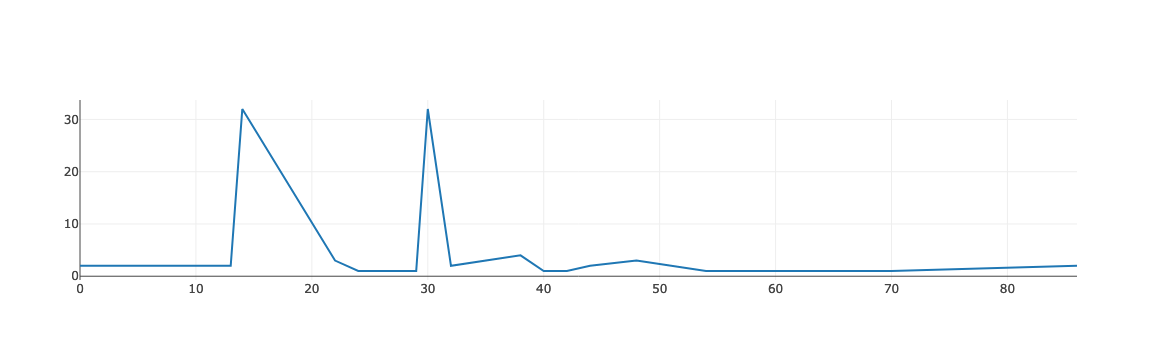

defined object LiveNodes
res3_1: String = "plot-7e7bf292-9375-4cb2-87d0-983b2e107d34"

In [4]:
object LiveNodes{ // Create object to supress output TODO: upgrade ammonite at some point
    val live = db.getAllLiveNodes()
    val (x,y) = live.groupBy(_.depth).map(a => (a._1, a._2.size)).toList.sortBy(_._1).unzip
//     val noSuc = live.filter(a => !live.exists(b => b.)) // find set of "active" nodes

// val (x, y) = Seq(
//   "Banana" -> 10,
//   "Apple" -> 8,
//   "Grapefruit" -> 5
// ).unzip
}
Scatter(LiveNodes.x, LiveNodes.y).plot()

In [7]:
def minCBDepth()= {
    val live = db.getLive()
    live.filter{a => a.qry.isLive}.map{_.ordDepth}
}
minCBDepth()

defined function minCBDepth
res6_1: Set[Int] = HashSet(0, 5, 2, 3, 4)

In [8]:
LiveNodes.live.map{_.depth}

res7: Set[Int] = HashSet(
  69,
  138,
  101,
  0,
  88,
  170,
  115,
  5,
  120,
  10,
  56,
  142,
  153,
  42,
  24,
  37,
  25,
  52,
  14,
  110,
  125,
  157,
  20,
  46,
  93,
  152,
  57,
  78,
  29,
  164,
  106,
  121,
  84,
  147,
  61,
  132,
  116,
  1,
...

In [27]:
def dumpFrom(liveNodes: Set[DBPathNode],outF:String):Unit = {
    import edu.colorado.plv.bounder.symbolicexecutor.state.PrettyPrinting
    val pp = new PrettyPrinting()
    val inspQ: Set[IPathNode] = liveNodes.filter(n => n.qry.getState.get.sf.pureFormula.exists{(p:PureConstraint) => 
        println(p.toString)
        p.toString.matches("p-5.*p-5")
    }).map(_.asInstanceOf[IPathNode])
    val pptr = pp.witnessToTrace(inspQ.toList,false)
    println(s"inspection set size: ${inspQ.size}")
    pp.dumpDebugInfo(inspQ.toSet, "timeout", true, Some(outF))
}
dumpFrom(LiveNodes.live,"/Users/shawnmeier/Desktop/AntennapodExecute_bug_workingdir")

p-2  !=  NULL
p-2  !=  NULL
p-2  !=  NULL
p-2  !=  NULL
p-2  !=  NULL
p-2  !=  NULL
p-2  !=  NULL
p-2  !=  NULL
p-2  !=  NULL
p-2  !=  NULL
inspection set size: 0


defined function dumpFrom

In [14]:
def dumpFromDepth(liveNodes: Set[DBPathNode],outF:String, sampDepth:Int):Unit = {
    import edu.colorado.plv.bounder.symbolicexecutor.state.PrettyPrinting
    val pp = new PrettyPrinting()
    val inspQ: Set[IPathNode] = liveNodes.filter(n => n.depth == sampDepth).map(_.asInstanceOf[IPathNode])
    val pptr = pp.witnessToTrace(inspQ.toList,false)
    println(s"inspection set size: ${inspQ.size}")
    pp.dumpDebugInfo(inspQ.toSet, "timeout", true, Some(outF))
}
// pp.qryString(inspQ.qry)
// Test1.pptr.take(3)

dumpFromDepth(LiveNodes.live, 
              "/Users/shawnmeier/Desktop/AntennapodExecute_fix_workingdir", 
                38)

inspection set size: 59
Writing trace 0 / 59, length: 38
Writing trace 1 / 59, length: 38
Writing trace 2 / 59, length: 38
Writing trace 3 / 59, length: 38
Writing trace 4 / 59, length: 38
Writing trace 5 / 59, length: 38
Writing trace 6 / 59, length: 38
Writing trace 7 / 59, length: 38
Writing trace 8 / 59, length: 38
Writing trace 9 / 59, length: 38
Writing trace 10 / 59, length: 38
Writing trace 11 / 59, length: 38
Writing trace 12 / 59, length: 38
Writing trace 13 / 59, length: 38
Writing trace 14 / 59, length: 38
Writing trace 15 / 59, length: 38
Writing trace 16 / 59, length: 38
Writing trace 17 / 59, length: 38
Writing trace 18 / 59, length: 38
Writing trace 19 / 59, length: 38
Writing trace 20 / 59, length: 38
Writing trace 21 / 59, length: 38
Writing trace 22 / 59, length: 38
Writing trace 23 / 59, length: 38
Writing trace 24 / 59, length: 38
Writing trace 25 / 59, length: 38
Writing trace 26 / 59, length: 38
Writing trace 27 / 59, length: 38
Writing trace 28 / 59, length: 38


defined function dumpFromDepth

In [57]:
def getEXSet() = {
    val locGroup = LiveNodes.live.groupBy(n => n.qry.loc)
    val mostVisitedList = locGroup.map{a => (a._1,a._2.size)}.toList.sortBy(a => a._2).reverse
    val mostVisitedNode = mostVisitedList.head._1
    
    val pp = new PrettyPrinting()
    val nodeList = locGroup(mostVisitedNode)
    val outf = File("/Users/shawnmeier/Desktop/db_triage/states.txt")
    nodeList.foreach{n => 
        outf.appendLine().append(pp.qryString(n.qry))
        outf.appendLine().append(s"subs: ${n.subsumedID}")
    }
}
    
getEXSet()

defined function getEXSet

In [24]:
LiveNodes.live.groupBy(n => n.subsumed.isDefined).map{a => (a._1,a._2.size)}

res23: Map[Boolean, Int] = HashMap(false -> 4909)

In [25]:
LiveNodes.live.groupBy(_.dbgTrace).map(a => (a._1.toString,a._2.size)).toList.sortBy(_._2).reverse

res24: List[(String, Int)] = List(
  (
    "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__18567), I_CIExit_View_setOnClickListener, I_CBEnter_Activity_onResume, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))",
    140
  ),
  (
    "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__14636), I_CIExit_View_setOnClickListener, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))",
    140
  ),
  (
    "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__18561), I_CIExit_View_setOnClickListener, I_CBExit_Activity_onPause, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))",
    126
  ),
  (
    "Some(List(I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__14636), I_CIExit_View_

In [26]:
LiveNodes.live.filter(_.dbgTrace.toString == "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__10335), I_CIExit_View_setOnClickListener, I_CBEnter_Activity_onResume, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))").groupBy(_.dbgHeap).map(a => (a._1.toString,a._2.size)).toList.sortBy(_._2).reverse.map(println)

res25: List[Unit] = List()

In [27]:
object OUT32{
    import edu.colorado.plv.bounder.symbolicexecutor.state.State
    val dbgNodes = LiveNodes.live.filter(_.dbgTrace.toString == "Some(List(I_CIExit_Dialog_show, I_CIEnter_Dialog_dismiss))").groupBy(_.dbgHeap).map(a => (a._1.toString,a._2.size,a._2)).toList.sortBy(_._2).reverse
    val nodeList = OUT32.dbgNodes.head._3.toList
    def pp(s:State) = {
        val o = List("locals:","heap:","types:","trace:").foldLeft(s.toString){
            case (acc,v) => acc.replace(s"$v", s"\n$v")
        }
        println(o)
    }
    val stateList = nodeList.map(n => n.qry.getState.get)
    val stackGrouped = stateList.groupBy(_.sf.callStack.toString()).toList.sortBy(_._2.size).reverse
}
OUT32.stackGrouped.map(a => (a._1, a._2.size))
//OUT32.stateList.sortBy(s => s.sf.callStack.toString()).take(10).foreach{OUT32.pp}


: 

In [ ]:
// old stuff


// val idents = List("net.khertan.forrunners/sample3")
// val idents = List("com.ridgelineapps.resdicegame/sample3", "com.ridgelineapps.resdicegame/sample1")
// val basedir = "/Users/shawnmeier/Documents/source/bounder/experiments/fdroid_subset_5"
// val bigexpPath = s"${basedir}/${ident}/paths.db"
// def dbgInfo(dbfile:String){
//     val db = DBOutputMode(dbfile,false)
//     val live = db.liveTraces()
//     println(s"live locations: ${live.size}")
//     val traceSet = live.map(tr => obsMessagesStr(tr)).toSet
//     println(s"unique obs traces: ${traceSet.size}")
    // Write sample trace to file
//     val out = File(s"${basedir}/${ident}")
//     val log = out / "obsLog.txt"
//     if(log.exists()) log.delete()
//     traceSet.foreach{ tr1 =>
//         val tr1 = traceSet.head
//         log.append("======\n")
//         tr1.foreach{n => 
//             log.append(n.qry.loc.toString)
//             log.append("\n")
//             log.append(n.qry.state.toString)
//             log.append("\n")
//         }
//     }
        
//     // Count distinct locations in wit
//     val locLog = out / "locLog.txt"
//     if(locLog.exists()) locLog.delete()
//     val locs = live.flatten.groupBy(n => n.qry.loc.containingMethod).map{case (k,v) => (v.size,k)}.toList.sortBy(_._1)
//     locs.foreach(l => locLog.append(s"${l._1} , ${l._2.toString}\n"))
        
//     // write stack of sample
//     val stackLog = out/ "stackLog.txt"
//     if(stackLog.exists()) stackLog.delete()
//     val pathNode = live.head.head
//     pathNode.qry.state.callStack.foreach(v => stackLog.append(v.exitLoc.toString + "\n"))
//     stackLog.append(pathNode.qry.state.toString)
// }
//idents.foreach(ident => dbgInfo(ident))
//dbgInfo()